# Линейные модели

## Почему вам будет полезен этот семинар:
1. Вы познакомитесь с этапами построения модели машинного обучения
2. Самостоятельно обучите модель
3. Узнаете, как правильно оценивать результаты работы моделей машинного обучения

Это поможет вам грамотнее управлять проектами по машинному обучению и лучше понимать их специфику.

**Область применения:**

* Прогноз стоимости ценных бумаг
* Анализ спроса, объема продаж
* Медицинские диагнозы
* Любые зависимости числа от времени
* Прогнозирование цен на недвижимость
* И многое другое....

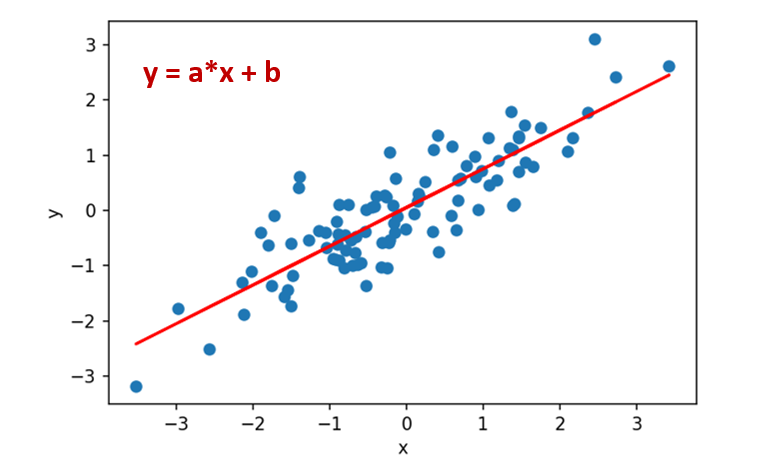




# Практика

На первом занятии мы научимся базовым приемам обучения моделей машинного обучения и поближе познакомимся с линейными моделями.

Мы будем работать с набором данных Bikes Rent, в котором по дням записаны календарная информация и погодные условия, характеризующие автоматизированные пункты проката велосипедов, а также число прокатов в этот день. Именно __число прокатов велосипедов__ мы и будем __предсказывать__; таким образом, мы будем решать задачу __регрессии__.

Для каждого дня проката известны следующие __признаки__:
* _season_: 1 - зима, 2 - весна, 3 - лето, 4 - осень
* _yr_: 0 - 2011, 1 - 2012
* _mnth_: от 1 до 12 (соответственно январь--декабрь)
* _holiday_: 0 - нет праздника, 1 - есть праздник
* _weekday_: от 0 до 6 (соответственно воскресенье--суббота)
* _workingday_: 0 - нерабочий день, 1 - рабочий день
* _weathersit_: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
* _temp_: температура в градусах Цельсия (нормированная)
* _hum_: влажность (нормированная)
* _windspeed(ms)_: скорость ветра в метрах в секунду (нормированная)
* _cnt_: количество арендованных велосипедов (это целевая переменная, ее мы будем предсказывать)

Для практики специально выбраны небольшие данные, чтобы построение моделей выполнялось быстро, а рассматриваемая задача и признаки были просты для интерпретации. Стоит отметить, что весь код, который мы будем писать, применим для совершенно любых данных; нужно только заменить название файла.

В практике нам потребуются две библиотеки:

* Pandas (от "panel data") - для подготовки данных.
С документацией для данной библиотеки можно ознакомиться здесь: https://pandas.pydata.org/docs/

* Sklearn (scikit-learn) - основная библиотека для машинного обучения. С документацией для данной библиотеки можно ознакомиться здесь:
https://scikit-learn.org/stable/user_guide.html

Нашей основной целью будет познакомиться с библиотекой sklearn - именно она отвечает за построение моделей, и благодаря тому, что она работает с уже подготовленными данными, код для этой библиотеки достаточно простой и унифицированный.

Далее мы выполним минимальный набор действий по загрузке данных и построению на них модели машинного обучения. План действий:
1. Сбор данных
1. Обработка данных
1. Обучение модели
1. Получение предсказаний модели
1. Оценка качества предсказаний
1. Анализ модели

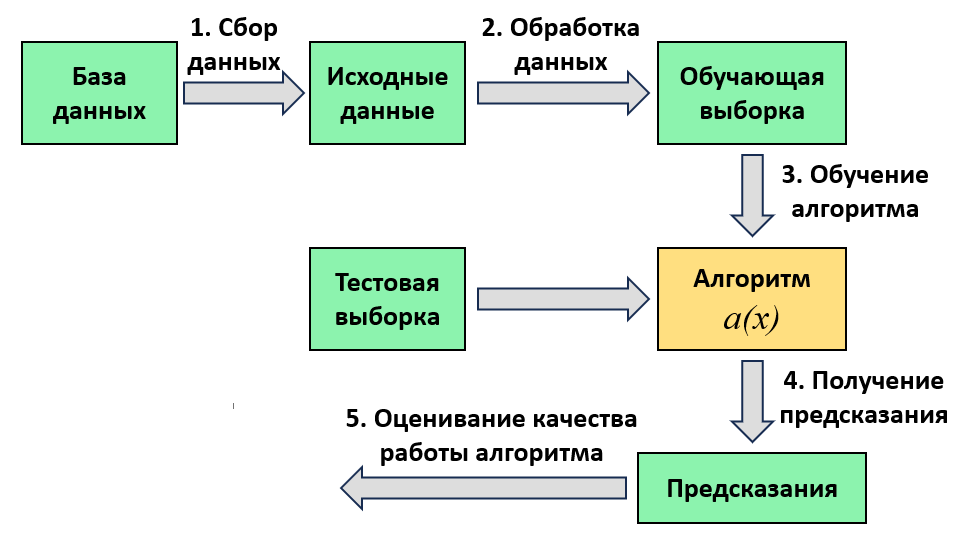

### Шаг 1. Сбор (подгрузка) данных

Загрузим данные с помощью библиотеки Pandas.

Импортируем библиотеку, сообщая Python, что далее мы будем обращаться к этой библиотеке как pd (as pd):

In [1]:
import pandas as pd #импортируем библиотеку pandas

Загружаем данные, используя функцию `read_excel` по ссылке:

In [2]:
# загружаем таблицу формата xlsx
data = pd.read_excel("https://github.com/Gaechka777/data/raw/main/bike.xlsx")

Также мы могли бы подгрузить данные напрямую из файла, часто еще используются файлы формата csv:

In [ ]:
#data = pd.read_csv('bike.csv', sep = ';') # загружаем файл формата сsv, разделитель ;

Посмотрим на фрагмент данных, для этого удобно использовать функцию `.head(N)`, которая показывает первые N строк данных. По умолчанию N=5, то есть показываются 5 строк.

In [3]:
data.head() # выводим первые пять строчек

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed(ms),cnt
0,1,0,1,0,6,0,2,0.355170,0.828620,0.284606,985
1,1,0,1,0,0,0,2,0.379232,0.715771,0.466215,801
2,1,0,1,0,1,1,1,0.171000,0.449638,0.465740,1349
3,1,0,1,0,2,1,1,0.175530,0.607131,0.284297,1562
4,1,0,1,0,3,1,1,0.209120,0.449313,0.339143,1600


По строкам таблицы расположены дни работы проката (объекты), по столбцам - их характеристики (признаки). Расшифровки столбцов были даны выше. В последнем столбце записаны значения cnt (число арендованных велосипедов) - это наша целевая переменная.

Число объектов и число признаков хранятся в переменной shape:

In [4]:
# число строк, число столбцов
data.shape

(731, 11)

### Шаг 2.1 Обработка данных: изучение данных

Мы можем вывести общую информацию про наши данные: количество непустых элементов в каждом столбце и тип каждого столбца

In [5]:
data.info() #общая информация про данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         731 non-null    int64  
 1   yr             731 non-null    int64  
 2   mnth           731 non-null    int64  
 3   holiday        731 non-null    int64  
 4   weekday        731 non-null    int64  
 5   workingday     731 non-null    int64  
 6   weathersit     731 non-null    int64  
 7   temp           731 non-null    float64
 8   hum            731 non-null    float64
 9   windspeed(ms)  731 non-null    float64
 10  cnt            731 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


Выведем описательные статистики для нашей таблицы

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
season,731.0,2.496580,1.110807,1.0,2.000000,3.000000,3.000000,4.0
yr,731.0,0.500684,0.500342,0.0,0.000000,1.000000,1.000000,1.0
mnth,731.0,6.519836,3.451913,1.0,4.000000,7.000000,10.000000,12.0
holiday,731.0,0.028728,0.167155,0.0,0.000000,0.000000,0.000000,1.0
weekday,731.0,2.997264,2.004787,0.0,1.000000,3.000000,5.000000,6.0
workingday,731.0,0.683995,0.465233,0.0,0.000000,1.000000,1.000000,1.0
weathersit,731.0,1.395349,0.544894,1.0,1.000000,1.000000,2.000000,3.0
temp,731.0,0.543594,0.228091,0.0,0.346343,0.547268,0.743002,1.0
hum,731.0,0.645649,0.146457,0.0,0.534704,0.644388,0.750857,1.0
windspeed(ms),731.0,0.346536,0.159766,0.0,0.232045,0.326928,0.434622,1.0


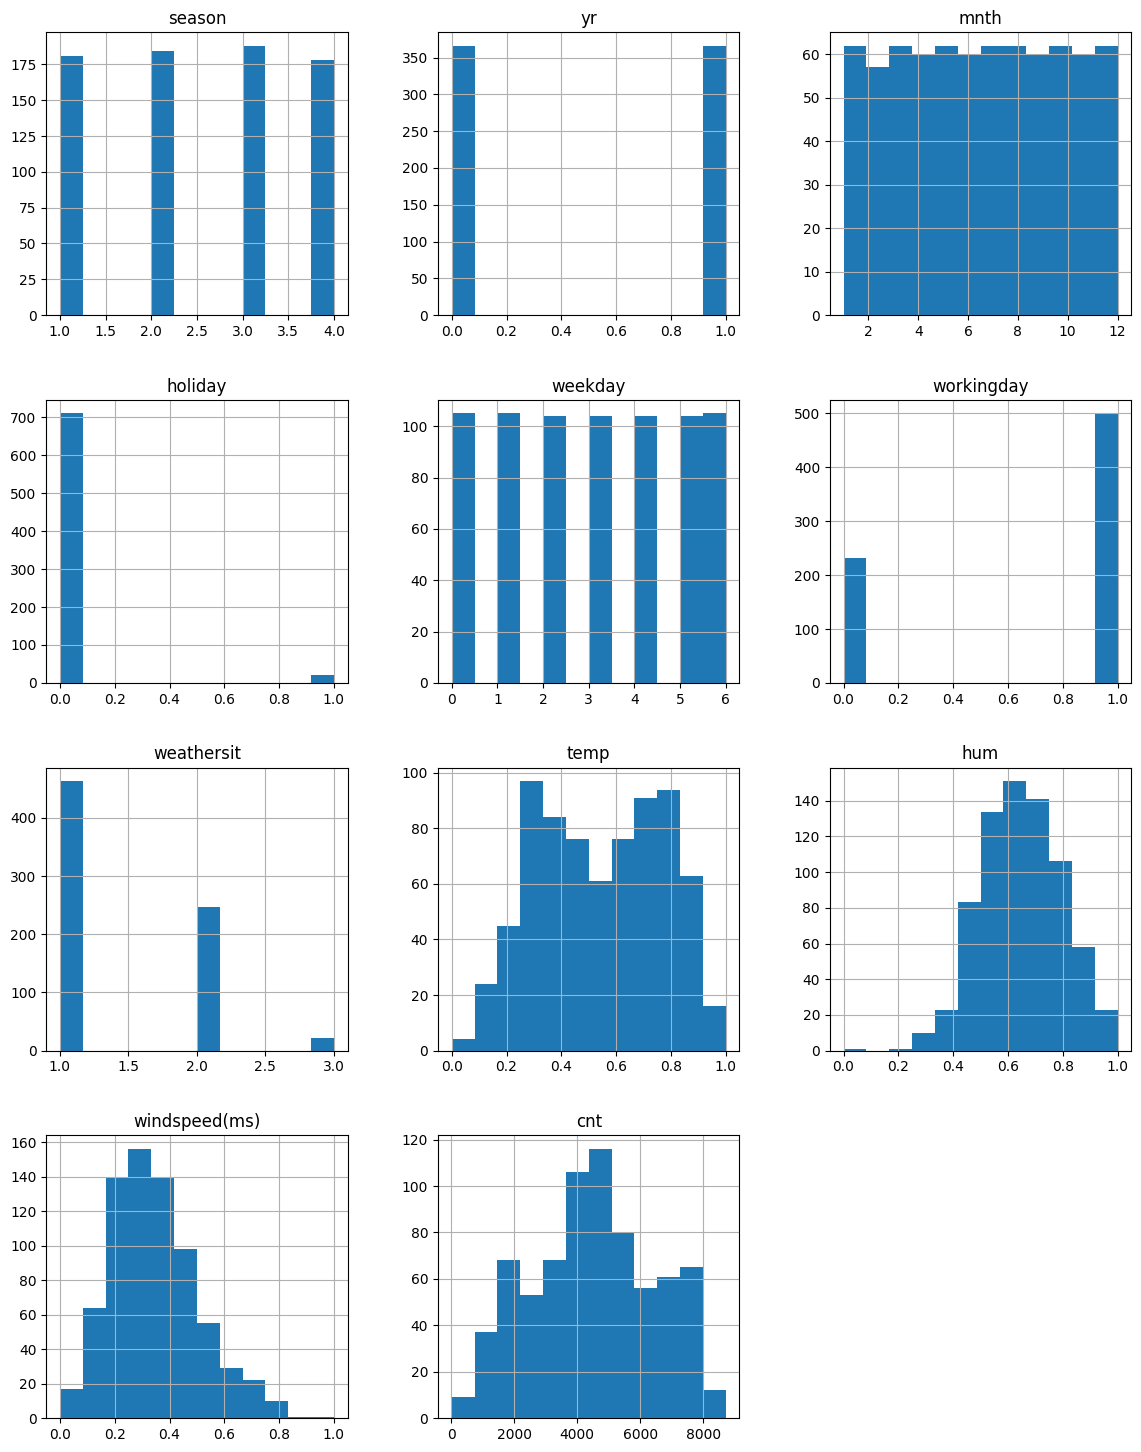

In [8]:
data.hist(figsize=(14, 18), bins=12);

**Вопрос**: почему в датасете больше данных о прокате велосипедов в 1 и 12 месяцы?

Давайте более детально рассмотрим столбец сезона в нашем датасете.

In [9]:
data['season']

,season
0,1
1,1
2,1
3,1
4,1
...,...
726,1
727,1
728,1
729,1


In [10]:
data['season'].value_counts()

,count
season,
3,188
2,184
1,181
4,178


Визуализируем данные при помощи библиотеки matplotlib

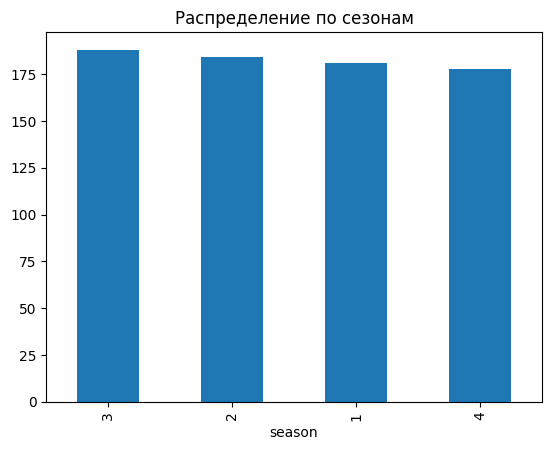

In [11]:
import matplotlib.pyplot as plt

data['season'].value_counts().plot(kind='bar', )
plt.title('Распределение по сезонам');

Рассчитаем максимальный поток ветра для определенного сезона

In [12]:
cond = data['season'] == 3 #маска для фильтрации
data[cond]['windspeed(ms)'].max()

0.728192535818503

In [13]:
print(data[data['holiday'] == 0]['cnt'].median(),
      data[data['holiday'] == 1]['cnt'].median())

4558.0 3351.0


#### Задача 1. Изучение признаков

Напишите код для извлечения значения **медианной температуры** во **втором сезоне**.

In [16]:
### Здесь Ваш код
#cond = data['season'] == 2 #маска для фильтрации
#data[cond]['temp'].median()

data[data['season'] == 2]['temp'].median()

0.6267042524914129

Напишите код для извлечения значения **средней скорости ветра** во **второй половине года**.

In [18]:
### Здесь Ваш код
#cond = data['mnth'] > 6 #маска для фильтрации
#data[cond]['windspeed(ms)'].mean()

data[data['mnth'] > 6]['windspeed(ms)'].mean()

0.3113264410153111

### Шаг 2.2 Обработка данных: подготовка данных

В нашей таблице содержатся и признаки, и целевая переменная. Разделим их с помощью специальной команды:

In [19]:
# отберем все колонки кроме последней: в ней находится целевая переменная
X = data.drop(['cnt'], axis=1)
Y = data["cnt"] #запишем в у целевую переменную

Это код, использующий библиотеку Pandas. Квадратные скобки означают выделение столбцов, внутри записываются желаемые столбцы.

Теперь у нас есть таблица признаков объектов, хранящаяся в переменной X, и значения целевой переменной ("ответы"), хранящиеся в переменной Y.

Следующий важный шаг - разделить данные на обучающую и тестовую части. Это позволит нам оценивать качество модели на данных, которые она еще не "видела".


Для разделения данных мы будем использовать библиотеку sklearn. Импортируем специальную функцию:

In [20]:
# импортируем функцию для разбиения данных на тестовую и обучающую выборки
from sklearn.model_selection import train_test_split

Внутри функции `train_test_split` записываем данные, X и Y, также указываем дополнительные параметры: `test_size` - какую долю объектов мы бы хотели отделить в тестовую выборку (укажем 30%), а также параметр `random_state`. Деление данных выполняется _случайно_ (случайно выбранные строки размещаются в обучающей и тестовой частях), и чтобы при повторном выполнении ячейки выполнялось одно и то же разделение данных, мы указываем параметр `random_state`. Значение `random_state` может быть любым числом, и его выбор не влияет на качество разделения, но обеспечивает одинаковое разделение при использовании одного и того же значения.

In [21]:
# реализуем разделение на train и test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

В результате мы получили переменные:
* `X_train` - таблица признаков для объектов _обучающей_ части данных (выборки)
* `X_test` - таблица признаков для объектов _тестовой_ выборки
* `Y_train` - вектор правильных ответов для объектов _обучающей_ выборки
* `Y_test` - вектор правильных ответов для объектов _тестовой_ выборки

Посмотрим, сколько объектов попало в обучающую часть:

In [22]:
X_train.shape

(511, 10)

511 строчек и 10 столбцов - 511 объектов и для каждого 10 признаков

Аналогично для тестовой части:

In [23]:
X_test.shape

(220, 10)

220 строчек и 10 столбцов - 220 объектов и для каждого 10 признаков

### Шаг 3. Обучение линейной модели


**Линейная модель** суммирует значения всех признаков с некоторыми весами.

**Веса $w_i$ при признаках** - параметры, которые необходимо настраивать в процессе обучения

$$
a(x) = w_0 + w_1 \cdot x_1 + ... + w_d \cdot x_d
$$

где $d$ - число признаков.

Мы готовы к тому, чтобы построить модель машинного обучения. Обучим линейную модель на наших данных. Для этого импортируем алгоритм LinearRegression из модуля sklearn:

In [24]:
# импортируем алгоритм для обучения линейной регрессии
from sklearn.linear_model import LinearRegression

Обучение модели в sklearn всегда состоит из двух шагов - создания модели (первая строка) и вызова функции fit:

In [25]:
model = LinearRegression() # определяем модель
model.fit(X_train, Y_train) # обучаем модель на обучающей выборке

LinearRegression()

Для обучения обязательно нужны обе переменные `X_train` и `Y_train`, так как в процессе обучения модель учится предсказывать целевые переменные по признакам.

После обучения "внутри" модели появились найденные веса:

In [26]:
model.coef_ # смотрим на коэффициенты - веса признаков

array([  491.66301206,  1940.24984286,   -36.18537078,  -417.63812751,
          58.22601869,    48.85286318,  -492.1258915 ,  4194.53117441,
       -1063.78514454, -1544.33657818])

In [27]:
model.intercept_ # свободный коэффициент

1971.9424103830647

Мы проанализируем эти веса позже, пока мы просто проверили, что они появились.

### Шаг 4. Получение предсказаний линейной модели

Чтобы выполнить предсказания, нужно воспользоваться функцией `model.predict(X)`, подставив вместо X нужную переменную. Функция возвращает последовательность из предсказаний для каждого объекта, их нужно сохранить в какую-то переменную.

Выполним предсказания на двух выборках, обучающей и тестовой, и сохраним их в переменные preds_train и preds_test.

In [28]:
# предсказываем значения целевой переменной для обучающей выборки
preds_train = model.predict(X_train)

# предсказываем значение целевой переменной для тестовой выборки
preds_test = model.predict(X_test)

Посмотрим на предсказания на первых 10 объектах ([:10] выделяет первые 10 чисел):

In [29]:
preds_test[:10] # выведем значения с первого по десятое

array([5098.81405196, 5446.21687258, 1725.82178742, 1262.09230959,
       4137.67413235, 2983.83673035, 3574.13585718, 6083.94100051,
       5503.73948907, 1348.84916008])

А вот соответствующие правильные ответы из выборки:

In [30]:
# выводим первые десять значений целевой переменной тестовой выборки
Y_test[:10].values

array([5923, 4592, 1248, 1360, 4075, 1817, 2659, 6234, 6857, 1167])

Сравнив два набора, можно увидеть, что в целом модель примерно "попадает" в порядок, но, конечно, не дает точных ответов, так как модели машинного обучения исходно задуманы, чтобы находить приближенные ответы. На следующем шаге мы полноценно оценим, насколько точны предсказани модели.

### Шаг 5. Оценивание качества

Сравнивать предсказания и правильные ответы вручную удобно только на маленькой выборке данных. Для оценивания качества работы модели нужно рассчитать метрику качества. Для этого в `sklearn` есть подмодуль `metrics`. Импортируем функции  `mean_squared_error` и `mean_absolute_error`:

**Среднее квадратическое отклонение или MSE (Mean Squared Error):**

$$ MSE = \frac{1}{N} \sum_{i=1}^{N} (a(x_i) - y_i) ^ 2 $$

$l$ - число объектов в выборке

Рассмотрим пример рассчета метрик, где модель предсказала 4 разных значения, а правильный ответ был всегда 10.

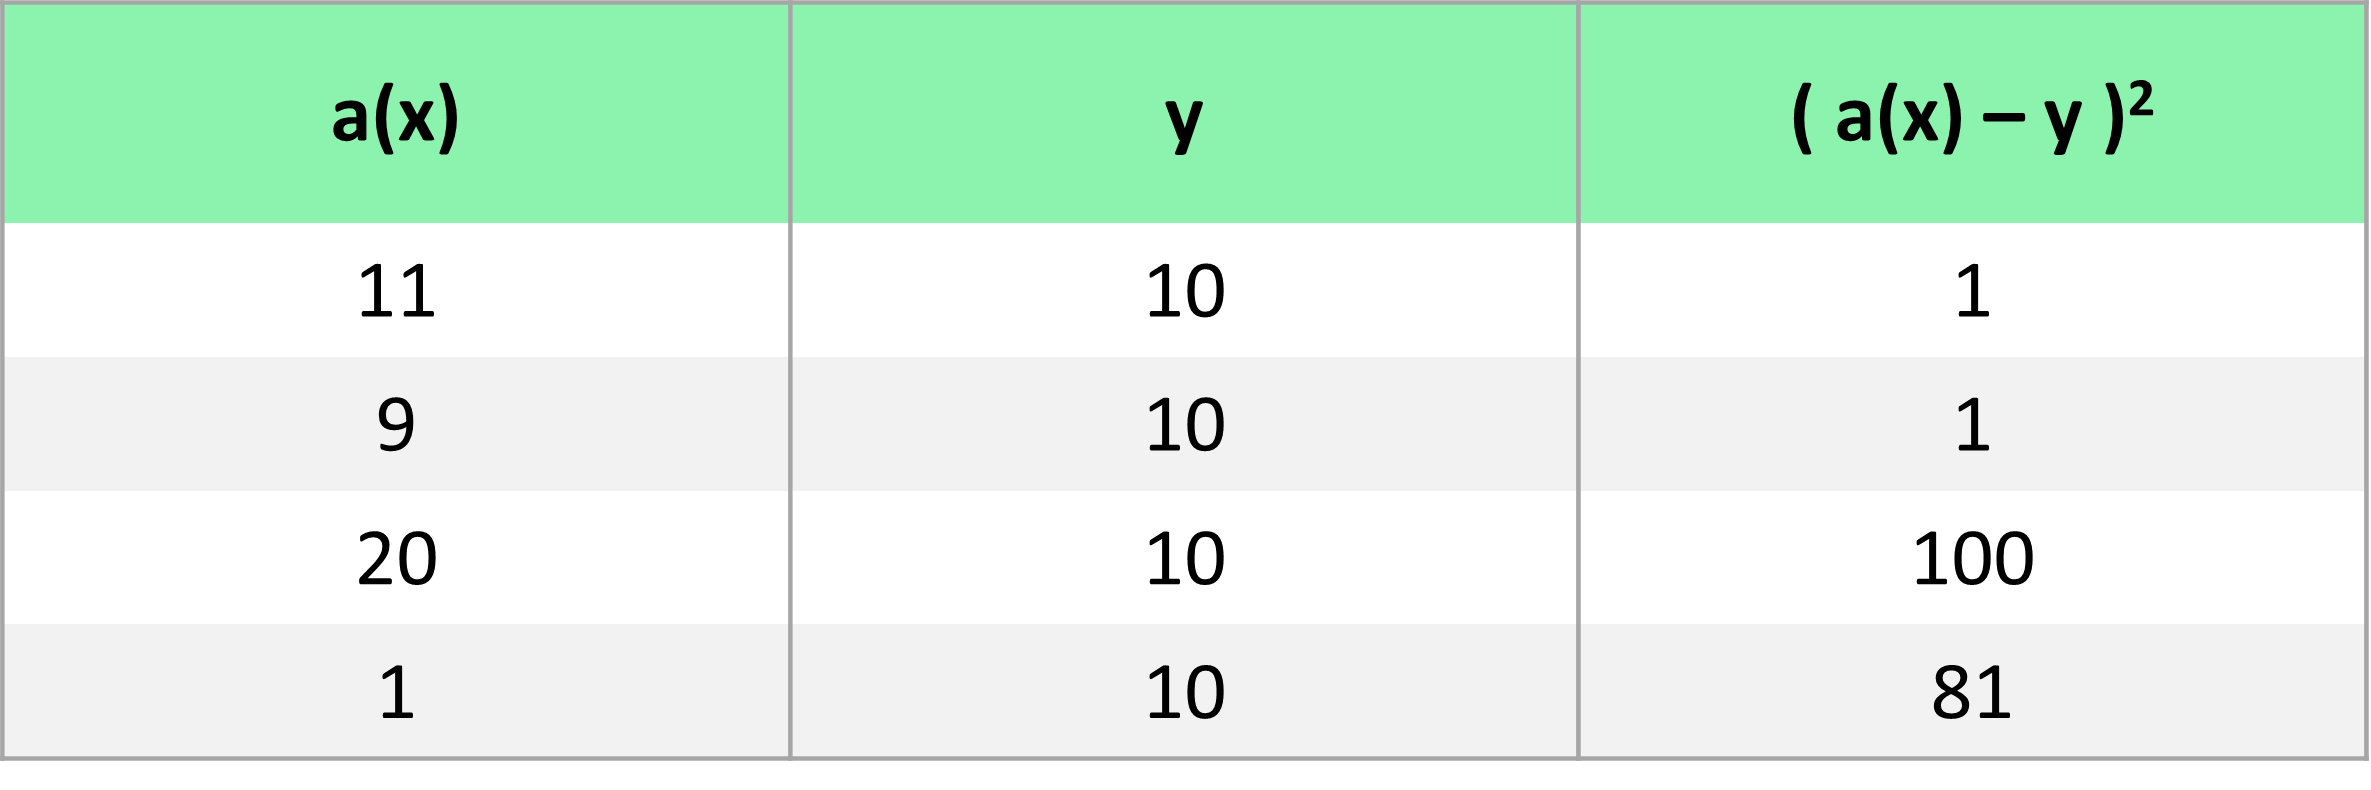


$$  MSE = \frac{1}{4} ((11 - 10)^ 2+ (9 - 10)^ 2 + (20 - 10)^ 2 + (1 - 10)^ 2)$$

$$ MSE = \frac{1}{4} (1 + 1 + 100 + 81) = 45.75 $$

In [31]:
# импортировали функцию для вычисления значения метрики MSE
from sklearn.metrics import mean_squared_error

Вычисляем ошибку на обучающей и тестовой выборке:

In [32]:
print('MSE train: ', mean_squared_error(Y_train, preds_train))
print('MSE test:  ', mean_squared_error(Y_test, preds_test))

MSE train:  750836.2381242722
MSE test:   790147.6348620439


При использовании метрики MSE обе ошибки измеряются в "количестве велосипедов" в квадрате, что сложно интерпретировать. Но можно взять квардратный корень:

In [33]:
import numpy as np
print('RMSE train: ', np.sqrt(mean_squared_error(Y_train, preds_train)))
print('RMSE test:  ', np.sqrt(mean_squared_error(Y_test, preds_test)))

RMSE train:  866.5080715863368
RMSE test:   888.9024889503032


**Среднее абсолютное отклонение или MAE (Mean Absolute Error):**

$$ MAE = \frac{1}{l} \sum_{i=1}^{l} |a(x_i) - y_i| $$

$l$ - число объектов в выборке

В примере:

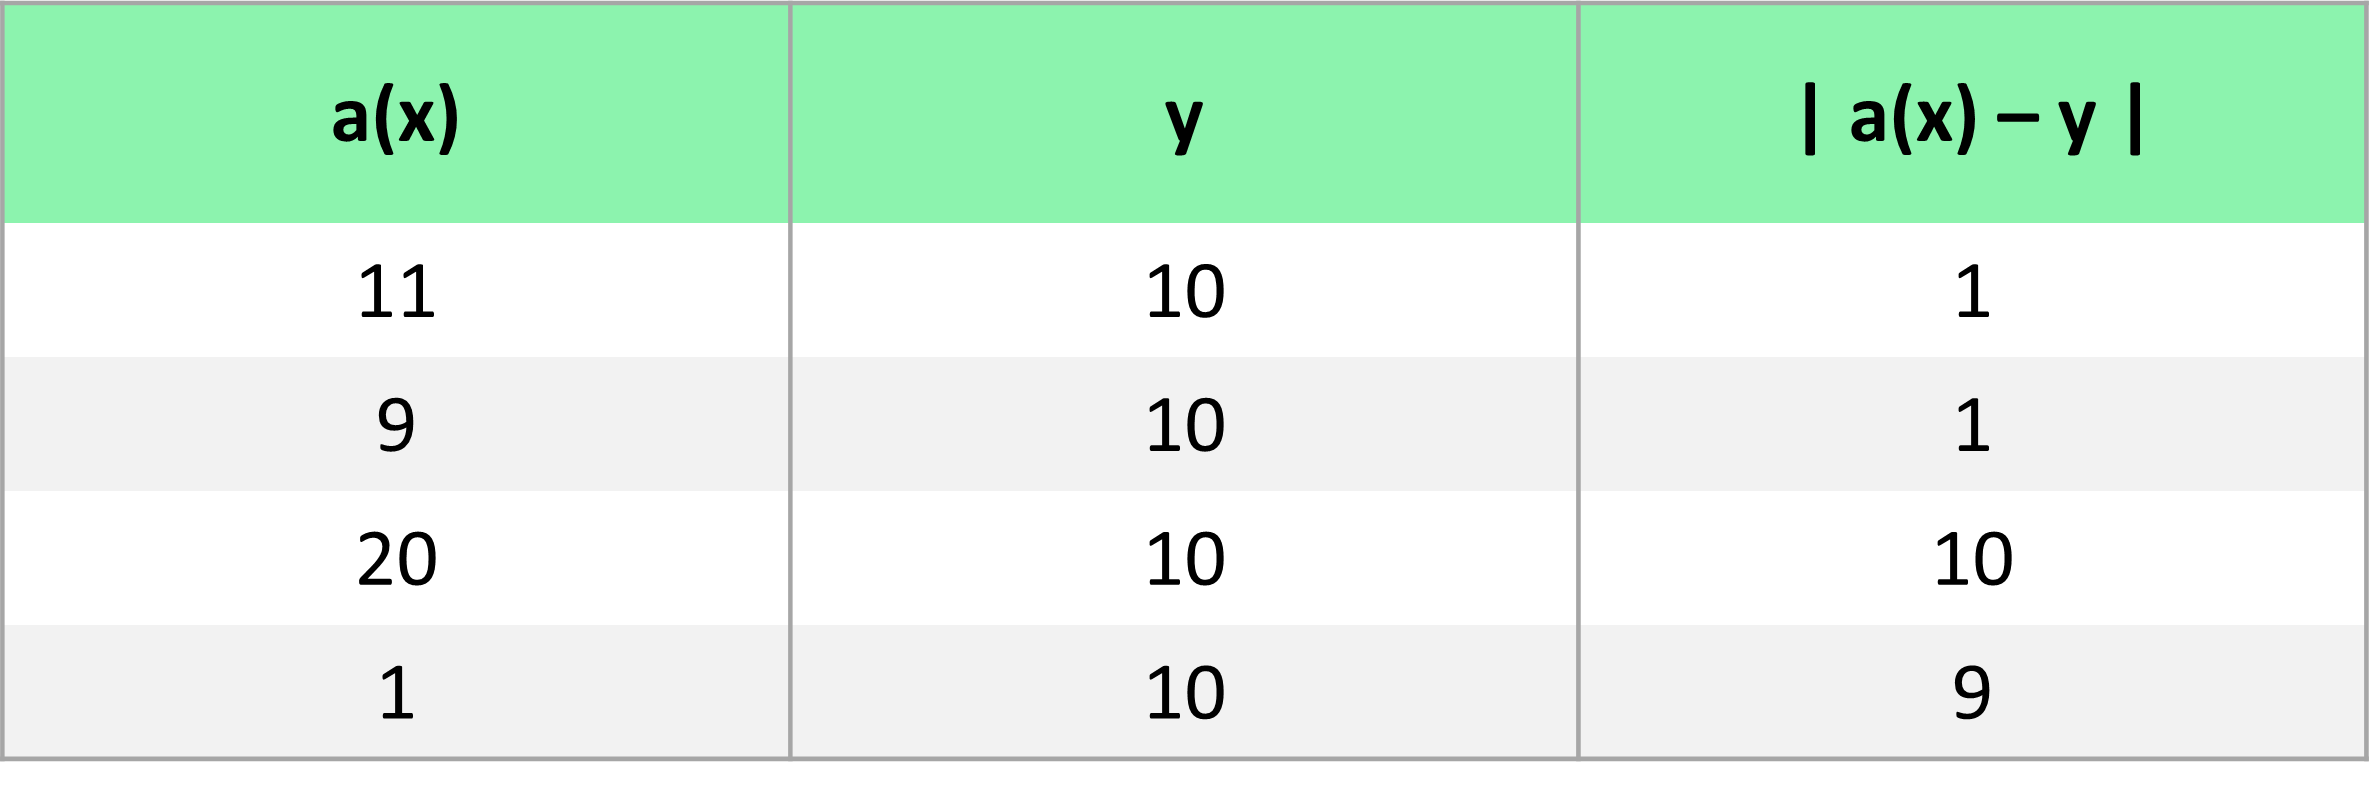

$$ MAE = \frac{1}{4} (1 + 1 + 10 + 9) = 5.25 $$

In [34]:
# импортировали функцию для вычисления значения метрики MAE
from sklearn.metrics import mean_absolute_error

Вычисляем ошибку на обучающей и тестовой выборке:

In [35]:
# нашли величину MAE для обучающей выборки
print('MAE train: ', mean_absolute_error(Y_train, preds_train))

# нашли величину MAE для тестовой выборки
print('MAE test:  ', mean_absolute_error(Y_test, preds_test))

MAE train:  638.2216121950269
MAE test:   673.1744257004561


В функции нужно подставить переменные, хранящие правильные ответы и предсказанные.

При использовании метрики MAE обе ошибки измеряются в "количестве велосипедов", то есть в среднем модель ошибается примерно на 630 велосипедов в день. Много это или мало? На предыдущем шаге мы увидели, что сами предсказываемые величины (число арендованных велосипедов) измеряются в тысячах - 4000, 6000 и т. д. Таким образом, ошибка почти на порядок меньше предсказываемых величин, что выглядит вполне разумно. Важно понимать, что модель построена всего по нескольким сотням объектов, и на такой маленькой выборке данный результат можно считать вполне хорошим.

Разрыва между ошибкой на обучающей и тестовой частях данных у нас нет, значит, переживать из-за возможности переобучения не стоит.

**Среднее абсолютное процентное отклонение или MAPE (Mean Absolute Percentage Error):**

Мы измеряли качество модели с помощью наиболее простой метрики Mean absolute error (MAE). Она измеряется в тех же единицах, что и целевая переменная, в нашем случае это число велосипедов. Но часто хочется иметь метрику в процентах. И, конечно, метрику легко модифицировать так, чтобы она принимала значения в процентах - получится Mean absolute percentage error (MAPE):

$$MAPE = \frac 1 N \sum_{n=1}^N \frac {|y_n-a(x_n)|}{|y_n|}$$

В данной формуле выполняется суммирование по объектам выборки, далее ошибка предсказания $|y_n-a(x_n)|$ на каждом объекте делится на модуль целевой переменной $|y_n|$. Получается, мы смотрим, на какой процент от той, величины, что мы хотим предсказать, модель в среднем ошибается. Вместо среднего можно использовать медиану для большей устойчивости к выбросам.

Однако, если у нас один из исходных $y_i$ будет равен 0, то метрика по такому наблюдению не посчитается. Так как мы не поделим на ноль.

В нашем примере:

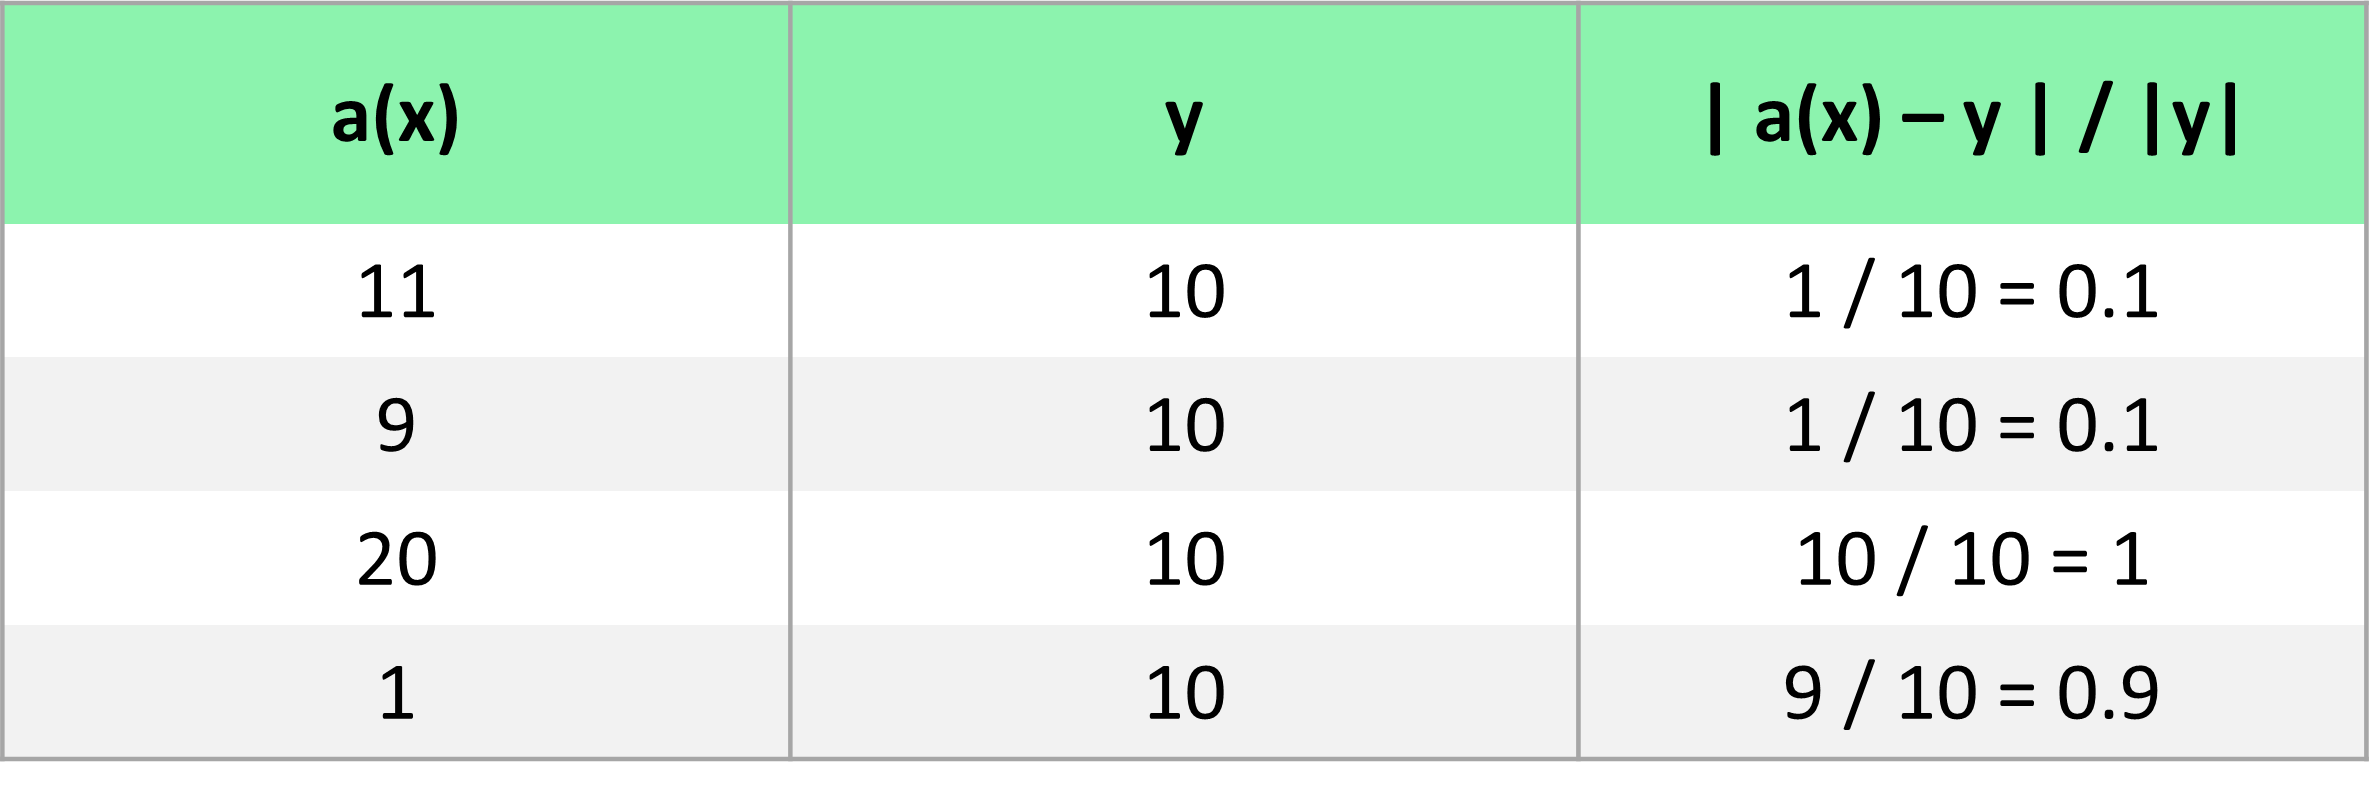


$$ MAPE = \frac{1}{4} (0.1 + 0.1 + 1 + 0.9) = 0.525 $$

In [36]:
from sklearn.metrics import mean_absolute_percentage_error #импортировали функцию для поиска значения метрики MAPE

In [37]:
print('MAPE train: ', mean_absolute_percentage_error(Y_train, preds_train)) #нашли величину MAPE для обучающей выборки
print('MAPE test:  ', mean_absolute_percentage_error(Y_test, preds_test)) #нашли величину MAPE для тестовой выборки

MAPE train:  0.5568730077020365
MAPE test:   0.20295844215692643


**R² (коэффициент детерминации):**

Коэффициент детерминации в линейной регрессии измеряет долю дисперсии (разброс значений) зависимой переменной, которую модель может объяснить. Он принимает значения от 0 до 1, где 1 указывает на идеальное соответствие модели данным. Хотя если предсказание модели очень плохое, $R^2$ может принимать значения до $-∞$.

Формула для R² выглядит следующим образом:

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \overline{y_i})^2}$$

Таким образом, R² измеряет, насколько хорошо модель соответствует данным, и чем ближе к 1, тем лучше моделью объясняется изменчивость зависимой переменной.

In [38]:
# импортировали функцию для поиска значения коэффициента детерминации
from sklearn.metrics import r2_score

In [39]:
 # нашли величину R^2 для обучающей выборки
print('R^2 train: ', r2_score(Y_train, preds_train))

# нашли величину R^2 для тестовой выборки
print('R^2 test:  ', r2_score(Y_test, preds_test))

R^2 train:  0.7904677955236905
R^2 test:   0.8085470232180787


#### Вопрос. Узнайте, в каких случаях какую метрику лучше использовать

**Давайте попробуем выполнить данное задание с помощью модели Mistral. Чтобы воспользоваться чатом, есть несколько вариантов:**


1. Кликните на данную ссылку https://chat.mistral.ai/;
2. Скопируйте данную ссылку https://chat.mistral.ai/ и вставьте ее в поисковую строку любого адреса;
3. На рабочем столе нажмите на ссылку, которая ведет к чату.

Чтобы выполнить это задание вам необходимо скопировать промпт без слова промпт в чат с мистралью.

**Промпт:**

Выпиши 5 главных метрик в задаче регрессии и укажи, в каких случаях какую метрику лучше использовать. Напиши ответ языком, понятным человеку, который почти не знаком с машинным обучением на русском языке.

### Шаг 6. Анализ модели

Посмотрим на веса признаков, найденные линейной моделью по обучающим данным. Запишем их в таблицу со столбцами "название признака" и "вес признака" и отсортируем по значениям весов:

In [40]:
weights_data = {
    "веса":model.coef_,
    "признаки": data.columns[:-1]
}

# задаем с помощью словаря веса и признаки модели
weights = pd.DataFrame(weights_data) # преобразовываем признаки с весами в таблицу
weights.sort_values("веса") # сортируем полученную таблицу

,веса,признаки
9,-1544.336578,windspeed(ms)
8,-1063.785145,hum
6,-492.125891,weathersit
3,-417.638128,holiday
2,-36.185371,mnth
5,48.852863,workingday
4,58.226019,weekday
0,491.663012,season
1,1940.249843,yr
7,4194.531174,temp


Внизу и вверху таблицы расположены признаки, для которых подобраны большие по модулю веса. У каждого признака свой масштаб, поэтому сравнивать веса некорректно. Но мы можем смотреть на знаки коэффициентов. Например, чем выше температура (temp), тем больше арендуют велосипедов, а чем выше показатель "плохой погоды" (weathersit), тем меньше арендуют велосипедов. Обе тенденции вполне логичны.

## Бонус: значимость признаков с помощью statsmodels


Быстро обучить линейную регрессию можно также с помощью библиотеки `statsmodels`. У нее есть полезная функция `summary()` которая выводит статистический отчет о модели.<br>
Этот отчёт содержит много информации, включая коэффициенты регрессии, стандартные ошибки, значения t-статистики, p-значения и многое другое. Эта информация может быть использована для оценки качества модели и значимости отдельных признаков.

In [41]:
import statsmodels.api as sm

# включить в модель свободный член
X_train_with_const = sm.add_constant(X_train)

# Обучение модели линейной регрессии с использованием statsmodels
lin_reg_sm = sm.OLS(Y_train, X_train_with_const).fit()

# Вывод статистического отчета
print(lin_reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     188.6
Date:                Tue, 21 Jan 2025   Prob (F-statistic):          1.36e-162
Time:                        09:29:32   Log-Likelihood:                -4181.7
No. Observations:                 511   AIC:                             8385.
Df Residuals:                     500   BIC:                             8432.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1971.9424    266.465      7.400

### Поэкспериментируем с моделью

В следующих нескольких задачах мы попробуем немного менять нашу модель и посмотрим, можно ли достичь _меньшей_ ошибки.


Для начала давайте исследуем эффект отключения свободного коэффициента в формуле линейной модели. Вспомним, как линейная модель выполняет предсказания:
$$a(x) = w_1 \cdot x_1 + w_2\cdot x_2 + w_3\cdot x_3+ \dots +w_d \cdot x_d +w_0 $$

Каждый из коэффициентов (весов) $w_1, \dots, w_d$ задает вклад соответствующего признака в предсказание. Последним в формуле следует коэффициент $w_0$, который задает, какое предсказание будет выполнено, если значения _всех_ признаков равны 0.

Давайте попробуем убрать $w_0$ из модели и посмотрим, как изменится средняя ошибка предсказания. Одновременно это будет хорошим упражнением по использованию библиотеки sklearn.

### Задания для самостоятельной работы

Перед выполнением заданий обязательно выполните все ячейки выше.
__При выполнении заданий используйте примеры кода, данные выше, а также__ [__таблицу с подсказками__](https://drive.google.com/file/d/1uQBr8a-CiQYJzuBIwIa2jBz7zDEab-hk/view?usp=sharing).

#### Задача 2. Обучение линейной модели без свободного коэффициента

Запишите код для __обучения__ модели (см. таблицу с подсказками по ссылке выше), а __далее внутри скобок в первой строчке__ укажите `fit_intercept=False`.



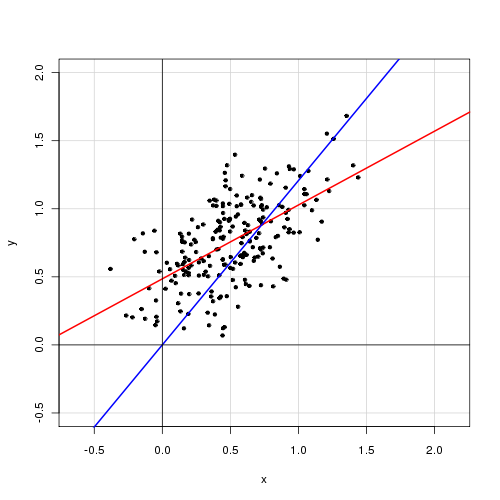

In [42]:
### Здесь Ваш код

# обучение модели
model = LinearRegression(fit_intercept=False)
model.fit(X_train, Y_train)

LinearRegression(fit_intercept=False)

#### Задача 3. Получение предсказаний линейной модели без свободного коэффициента

Выполните __предсказания__ с помощью модели, обученной в предыдущей задаче. Отдельно выполните предсказания для обучающей части данных (`X_train`), отдельно - для тестовой (`X_test`).

In [44]:
### Здесь Ваш код

preds_train = model.predict(X_train)
preds_test = model.predict(X_test)
#print(f'preds_train=${preds_train}, preds_test=${preds_test}')

#### Задача 4. Измерение ошибки линейной модели без свободного коэффициента

Выведите значение ошибки для предсказаний, выполненных в предыдущей задаче. Выведите отдельно ошибку на обучающей части данных и отдельно - на тестовой.

In [55]:
### Здесь Ваш код
print(f"MSA train: {mean_absolute_error(Y_train, preds_train)}")
print(f"MSA test:  {mean_absolute_error(Y_test, preds_test)}")

print('R^2 train: ', r2_score(Y_train, preds_train))
print('R^2 test:  ', r2_score(Y_test, preds_test))

MSA train: 676.0946463759246
MSA test:  700.1630834359684
R^2 train:  0.7675174802776565
R^2 test:   0.7967070863329548


__Сравните__ полученные значения ошибки с теми, что мы получали ранее. Позитивно или негативно сказалось отключение свободного коэффициента на ошибке линейной модели?

### Бонус: Кодирование категориальных признаков

В наших данных есть несколько признаков, которые принимают значения из фиксированного небольшого набора. Речь идет о признаках месяца, днях недели и сезона, и называются такие признаки _категориальными_. В текущем виде наших данных эти признаки просто пронумерованы. Это не лишено смысла, потому что и дни недели, и месяцы являются упорядоченными. Но с другой стороны, когда мы применяем линейную модель, она умножает значения признаков на веса, и, например, умножение "понедельника" на 2 не делает его "вторником", а значит, применять такое умножение не очень корректно.

Обычно для категориальных признаков используют дополнительную обработку, чтобы избежать таких некорректностей. В частности, вместо одного категориального признака создают несколько новых признаков, принимающих значения 0 и 1. Например, для признака "сезон" будет создано 4 новых, каждый отвечает за конкретный сезон. Если в конкретный день было лето, то значение признака "сезон-лето" будет равно 1, а значения признаков "сезон-весна", "сезон-осень" и "сезон-зима" будут 0.


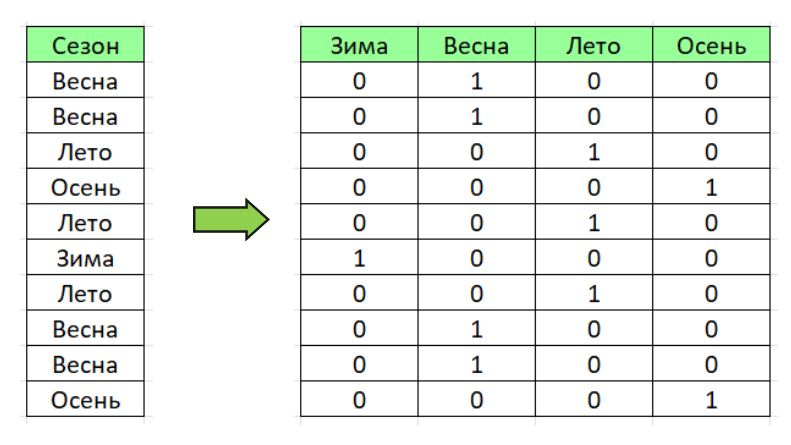

Попробуем применить такую обработку к нашим данным. Для этого воспользуемся функций `get_dummies` из библиотеки `pandas`:

In [56]:
data_cat = pd.get_dummies(
    data, # задаем, для каких данных делаем дамми-переменные
    columns=["season", "mnth", "weekday"], # определяем признаки для трансформации
    drop_first=True # устанавливаем удаление первой переменной
)

data_cat.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed(ms),cnt,season_2,season_3,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,2,0.355170,0.828620,0.284606,985,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0,0,0,2,0.379232,0.715771,0.466215,801,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,1,1,0.171000,0.449638,0.465740,1349,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0,0,1,1,0.175530,0.607131,0.284297,1562,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0,0,1,1,0.209120,0.449313,0.339143,1600,False,False,...,False,False,False,False,False,False,True,False,False,False


Внутри `pd.get_dummies` мы указываем нашу таблицу с данными data, которую мы загрузили в самом начале занятия, и также указываем в списке, какие столбцы необходимо закодировать нулями и единицами, у нас это `["season", "mnth", "weekday"]`.

Каждый раз, когда мы кодируем переменные с помощью `pd.get_dummies`, мы сталкиваемся с проблемой того, что одну из категорий всегда можно предсказать на основе других. При сильной зависимости признаков, модели будет сложно определить, насколько каждый из признаков влияет на целевую переменную - коэффициенты регрессионной модели не будут передавать верную информацию. Поэтому мы указываем аргумент `drop_first=True`, который позволяет убрать избыточность столбцов.

Теперь, прежде чем построить модель, нам придется повторить предобработку данных: отделение X и Y, деление на обучающую и тестовую части.

#### Задача 5. отделение X и Y. Деление данных на обучение и тест

Разделите данные на признаки и целевую переменную.

In [57]:
### Здесь Ваш код

# X_cat = ...
# Y_cat = ...
X_cat = data_cat.drop(['cnt'], axis=1)
#X_cat = data_cat[data_cat.columns.drop('cnt')]
Y_cat = data_cat["cnt"] #запишем в у целевую переменную

Разделите данные на обучающую и тестовую части. В подсказке деление данных показано на второй странице.

In [58]:
### Здесь Ваш код

# X_train, X_test, Y_train, Y_test = ... ### Здесь Ваш код
X_train_cat, X_test_cat, Y_train_cat, Y_test_cat = train_test_split(X_cat, Y_cat, test_size=0.3, random_state=0)

#### Задача 6. Обучение, предсказание и вычисление ошибки с закодированными категориальными признаками

Повторите шаги задач 1-3, то есть обучение, выполнение предсказаний и оценивание ошибки, для новой версии данных, включающей обработанные категориальные признаки.

In [63]:
### Здесь Ваш код

# model = ...
model_cat = LinearRegression(fit_intercept=True)
model_cat.fit(X_train_cat, Y_train_cat)

# обучение модели

# preds_train = ...
# preds_test = ...
preds_train_cat = model_cat.predict(X_train_cat)
preds_test_cat = model_cat.predict(X_test_cat)

print("Train:", mean_absolute_error(Y_train_cat, preds_train_cat))
print("Test:", mean_absolute_error(Y_test_cat, preds_test_cat))

print('R^2 train: ', r2_score(Y_train_cat, preds_train_cat))
print('R^2 test:  ', r2_score(Y_test_cat, preds_test_cat))

Train: 563.9086259641849
Test: 603.7599577617561
R^2 train:  0.8316868797779632
R^2 test:   0.849388058993099


__Сравните__ полученные значения ошибки с предыдущими моделями.

Посмотрим на веса новой модели:

In [61]:
weights_data = {"веса":model_cat.coef_,\
                "признаки": data_cat.columns.drop("cnt")}
weights = pd.DataFrame(weights_data)
weights.sort_values("веса")

,веса,признаки
5,-1883.365134,hum
6,-1817.417841,windspeed(ms)
3,-462.145515,weathersit
15,-258.482589,mnth_7
19,-253.998584,mnth_11
1,-155.931344,holiday
21,-130.193328,weekday_1
20,-116.047573,mnth_12
22,-25.627206,weekday_2
23,-12.082353,weekday_3


Теперь у каждой категории есть свой вес. Например, месяцы апрель, май, сентябрь, октябрь (`mnth_4`, `mnth_5`, `mnth_9`, `mnth_10`) имеют положительные веса, то есть в эти месяцы арендуют больше велосипедов.

## Бонус: Градиентный спуск

Вспомним что такое градиентный спуск и как он работает.<br><br>
Градиентный спуск — это алгоритм оптимизации, который используется для нахождения минимума функции. Основная идея заключается в следующем: чтобы минимизировать функцию, мы будем двигаться в направлении, противоположном градиенту этой функции. Градиент показывает направление наибольшего возрастания функции, поэтому движение в противоположном направлении будет приводить к её уменьшению.

На каждом шаге алгоритм обновляет параметры модели в направлении, противоположном градиенту функции потерь, с умножением на заданный коэффициент обучения. Это продолжается до тех пор, пока изменение функции потерь не станет достаточно малым или не будет достигнуто максимальное количество итераций.

Формула градиентного спуска в общем виде:

$$ \mathbf{x}_{i+1} = \mathbf{x}_{i} - a \cdot \nabla \text{Loss}(\mathbf{{x}_{i}}) $$
где

$a$ - learning rate (скорость обучения), который управляет величиной шага на каждой итерации; <br>
$\nabla \text{Loss}({x}_{i})$ - градиент (частная прозводная) функции потерь по параметрам $x_i$.

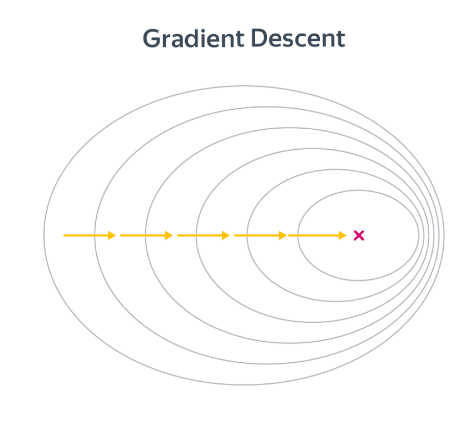

**Частная производная MSE** по каждому весу задается следующим образом:
   $$
   \frac{\partial}{\partial w_j} \text{MSE} = \frac{1}{m} \sum_{i=1}^{m} \left(\mathbf{x}^{(i)} \cdot \mathbf{w} - y^{(i)}\right) x_j^{(i)}
   $$

   или

   $$
   \frac{\partial}{\partial w_j} \text{MSE} = \frac{1}{m} \sum_{i=1}^{m} \left(\mathbf{y_{pred}}^{(i)} - y_{true}^{(i)}\right) x_j^{(i)}
   $$

Одним из самых важных гиперпараметров градиентного спуска является `learning rate` (скорость обучения). Подбор оптимального learning rate в методе градиентного спуска критически важен. Learning rate определяет шаг, на который модель будет обновлять свои параметры на каждой итерации. Если learning rate слишком мал, сходимость может быть слишком медленной, требуя большого количества итераций. Если же learning rate слишком велик, модель может не сойтись к оптимальному решению и расходиться.

Оптимально подобранный learning rate позволяет градиентному спуску быстро сойтись к оптимальному решению, ускоряя обучение модели, и при этом обеспечивает устойчивость процесса обновления параметров.

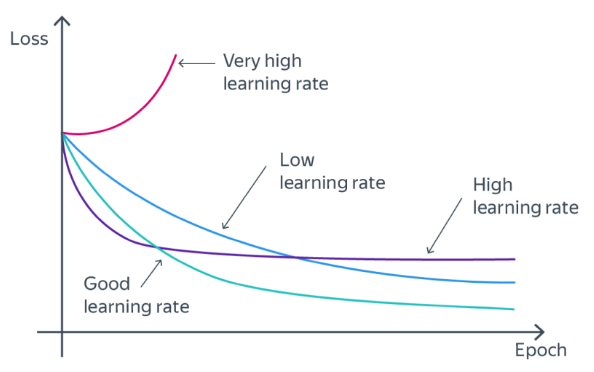

In [64]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Добавим столбец для свободного члена в начало
X_train_scaled = np.hstack([
    np.ones((X_train_scaled.shape[0], 1)), X_train_scaled
])

X_test_scaled = np.hstack([
    np.ones((X_test_scaled.shape[0], 1)), X_test_scaled
])

# Зададим гиперпараметры
learning_rate = 0.1
n_iterations = 10000
m = X_train_scaled.shape[0] # количество объектов
n = X_train_scaled.shape[1] # количество признаков

# Случайно инициализируем веса
np.random.seed(42)
weights = np.random.randn(n)

# Запустим алгоритм градиентного спуска
for iteration in range(n_iterations):
    predictions = X_train_scaled.dot(weights) # предсказания
    errors = predictions - Y_train # ошибка

    # вычисляем направление спуска (grad_f(x))
    gradients = 1/m * X_train_scaled.T.dot(errors)
    weights -= learning_rate * gradients # обновляем значение в точке

In [65]:
# Получим предсказания
Y_pred = X_test_scaled.dot(weights)

# Вычислим MAE
print("Test:", mean_absolute_error(Y_test, Y_pred))

Test: 673.1744257004561


# Бонус

### Регуляризация

Чтобы бороться с возможным переобучением линейных моделей можно использовать модели с ***регуляризацией***. Ключевой признак переобучения линейной модели - большие веса при нормализированных признаках. Давайте будем штрафовать модели за большие веса.



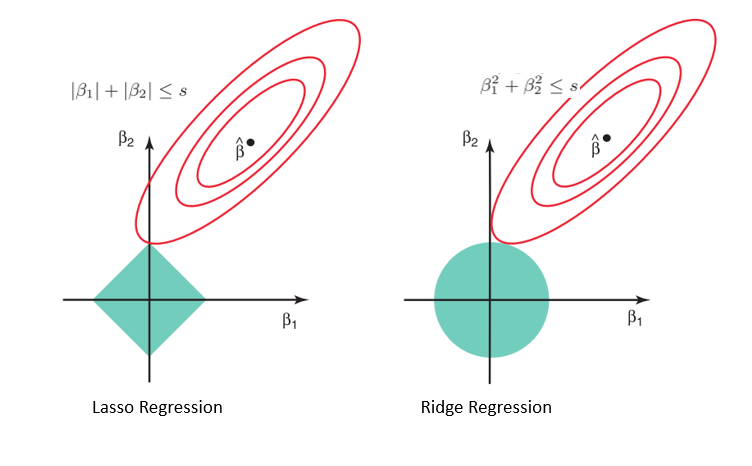

В линейных моделях есть специальные модификации для борьбы с переобучением, называемые *Ridge* и *Lasso*.

Модель **Lasso** прибавляет к нашей функции ошибок штраф, основанный на сумме абсолютных значений коэффициентов модели.

$$Lasso Loss = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y_i})^2 + \alpha\sum_{j=1}^{m}|w_j|$$

В свою очередь, модель **Ridge** использует штраф, основанный на сумме квадратов весов.


$$Ridge Loss = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y_i})^2 + \alpha\sum_{j=1}^{m}w_j^2$$

Величина штрафа регулируется через коэффициент **$\alpha$**.

**Lasso** и **Ridge** во время обучения требуют, чтобы не только ошибка на обучающих данных была как можно ниже, но и чтобы веса были как можно более близки к нулю и чтобы часть из них приняла нулевые значения. А если какой-то признак умножается на нулевой вес, это равносильно удалению этого признака. Давайте применим этот механизм к нашим данным и посмотрим, какие признаки отберет модель.

Импортируем модель `Lasso`, выполним обучение, предсказание и оценку ошибки:

Перед использованием `Lasso` регрессии необходимо стандартизировать признаки, чтобы все они были в одинаковых единицах измерения. Для этого будем использовать `StandardScaler` из sklearn!

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
# импортируем модель для построения Лассо-регрессии
from sklearn.linear_model import Lasso

In [68]:
model = Lasso() #определяем модель
model.fit(X_train_scaled, Y_train) #обучаем модель
preds_train = model.predict(X_train_scaled) #делаем предсказание для обучающих данных
preds_test = model.predict(X_test_scaled) #делаем предсказание для тестовых данных

print("Ошибка на обучении:", mean_absolute_error(Y_train, preds_train)) #находим значение МАЕ для обучающей выборки
print("Ошибка на тесте:", mean_absolute_error(Y_test, preds_test))#находим значение МАЕ для тестовой выборки
print("Число активных признаков:", sum(model.coef_!=0), \
      "/", model.coef_.shape[0])

Ошибка на обучении: 638.1662790250411
Ошибка на тесте: 673.7424048007367
Число активных признаков: 10 / 10


Посмотрим на веса:

In [69]:
weights_data = {"веса":model.coef_,\
                "признаки": X_train.columns}
weights = pd.DataFrame(weights_data)
weights.sort_values("веса")

,веса,признаки
6,-263.883242,weathersit
9,-244.738499,windspeed(ms)
8,-151.410583,hum
2,-118.553877,mnth
3,-72.058093,holiday
5,21.837473,workingday
4,113.677673,weekday
0,537.674456,season
1,969.311461,yr
7,969.877107,temp


Наша метрика качества на тесте стала чуть ниже. Однако, это не гарантирует, что мы правильно выбрали коэффициент регуляризации. Давайте попробуем его подобрать.

#### Задача 7. Выбор коэффициента в модели Lasso

Коэффициент задается через параметр `alpha`: `Lasso(alpha=0.1)`. Попробуйте использовать коэффициенты 0.00001, 0.001, 1, 10, 100, 1000. Для каждого значения коэффициента повторите наши стандартные шаги: обучение, выполнение предсказания, оценивание ошибки на обучающих и тестовых данных. Кроме того, нужно вывести текущее значение alpha и количество ненулевых весов (код для этого дан выше в ячейке с обучением модели Lasso).

__Упрощенная версия:__ создайте несколько новых ячеек с помощью кнопки +Code слева вверху, в каждую скопируйте код с моделью Lasso и поменяйте значение коэффициента.

__Стандартная версия:__ используйте цикл, чтобы перебрать различные значения коэффициента `alpha`. Ниже приведен пример цикла.

In [70]:
# напоминание: циклы
for number in [0.1, 1, 10]:
    print("Текущее число:", number)

Текущее число: 0.1
Текущее число: 1
Текущее число: 10


In [71]:
### Здесь Ваш код

for alpha_log in range(-5, 4):
    alpha = 10**alpha_log

    # model = ...
    # обучение модели
    # preds_train = ...
    # preds_test = ...

    print("Alpha:", alpha)
    print("Ошибка на обучении:", mean_absolute_error(Y_train, preds_train))
    print("Ошибка на тесте:", mean_absolute_error(Y_test, preds_test))
    print("Число активных признаков:", sum(model.coef_!=0), \
      "/", model.coef_.shape[0])

Alpha: 1e-05
Ошибка на обучении: 638.1662790250411
Ошибка на тесте: 673.7424048007367
Число активных признаков: 10 / 10
Alpha: 0.0001
Ошибка на обучении: 638.1662790250411
Ошибка на тесте: 673.7424048007367
Число активных признаков: 10 / 10
Alpha: 0.001
Ошибка на обучении: 638.1662790250411
Ошибка на тесте: 673.7424048007367
Число активных признаков: 10 / 10
Alpha: 0.01
Ошибка на обучении: 638.1662790250411
Ошибка на тесте: 673.7424048007367
Число активных признаков: 10 / 10
Alpha: 0.1
Ошибка на обучении: 638.1662790250411
Ошибка на тесте: 673.7424048007367
Число активных признаков: 10 / 10
Alpha: 1
Ошибка на обучении: 638.1662790250411
Ошибка на тесте: 673.7424048007367
Число активных признаков: 10 / 10
Alpha: 10
Ошибка на обучении: 638.1662790250411
Ошибка на тесте: 673.7424048007367
Число активных признаков: 10 / 10
Alpha: 100
Ошибка на обучении: 638.1662790250411
Ошибка на тесте: 673.7424048007367
Число активных признаков: 10 / 10
Alpha: 1000
Ошибка на обучении: 638.1662790250411
О

В выводе могло появиться предупреждающее сообщение - оно говорит, что модель обучилась некачественно (это случилось для самых больших значений коэффициента alpha).

Мы получили, что при малых значениях `alpha` веса не обнуляются,  ошибка остается такой же, какую мы получали раньше. При больших значениях `alpha` большинство весов обнуляются (то есть соответствующие признаки исключаются из модели), а ошибка растет. Это означает, что мы слишком сильно ограничили нашу модель, и она не может подстроиться под данные. При средних значениях `alpha` обнуляется небольшое количество весов, а ошибка остается на приемлемом уровне - такие значения являются оптимальными.

#### Задача 8. Выбор коэффициента в модели Ridge


Аналогичным образом работает модель **Ridge**. Проделайте с ней все те же шаги и сравните результаты.

**Давайте попробуем выполнить данное задание с помощью модели Mistral. Чтобы воспользоваться чатом, есть несколько вариантов:**


1. Кликните на данную ссылку https://chat.mistral.ai/;
2. Скопируйте данную ссылку https://chat.mistral.ai/ и вставьте ее в поисковую строку любого адреса;
3. На рабочем столе нажмите на ссылку, которая ведет к чату.

Чтобы выполнить это задание вам необходимо скопировать пропмт без слова промпт с кодом под текстовой частью промпта в чат с мистралью.

**Промпт:**

Допиши код ниже, чтобы подобрать параметры Ridge регрессии. Данные для обучения и проверки модели называются X_train_scaled и X_test_scaled.

```from sklearn.linear_model import Ridge

### Здесь Ваш код

for alpha_log in range(-5, 4):
    alpha = 10**alpha_log

    # model = ...
    # обучение модели
    # preds_train = ...
    # preds_test = ...

    print("Alpha:", alpha)
    print("Ошибка на обучении:", mean_absolute_error(Y_train, preds_train))
    print("Ошибка на тесте:", mean_absolute_error(Y_test, preds_test))
    print("Число активных признаков:", sum(model.coef_!=0), \
      "/", model.coef_.shape[0])
      
```

In [ ]:
from sklearn.linear_model import Ridge

### Здесь Ваш код

for alpha_log in range(-5, 4):
    alpha = 10**alpha_log

    # model = ...
    # обучение модели
    # preds_train = ...
    # preds_test = ...

    print("Alpha:", alpha)
    print("Ошибка на обучении:", mean_absolute_error(Y_train, preds_train))
    print("Ошибка на тесте:", mean_absolute_error(Y_test, preds_test))
    print("Число активных признаков:", sum(model.coef_!=0), \
      "/", model.coef_.shape[0])

### Итоги экспериментов с линейной моделью

* Отключение свободного коэффициента ухудшает качество предсказаний, не стоит его отключать
* Грамотная обработка категориальных признаков позволила значительно улучшить качество модели (уменьшить ошибку)
* Часть признаков могут быть исключены из модели практически без потери качества